**Условие 1: Задача 1**
Постройте график
Назовите график
Сделайте именование оси x и оси y
Сделайте выводы

**1.1.** Данные из прошлого дз

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('D:\Lena\Geekbrains\HomeWork\PythonHW\kc_house_data.csv', sep=',')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**1.2** Изучите стоимости недвижимости

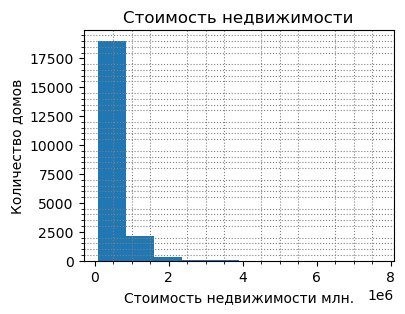

In [3]:
plt.figure(figsize=(4,3))
plt.hist(df['price'])
plt.xlabel('Стоимость недвижимости млн.')
plt.ylabel('Количество домов')
plt.title('Стоимость недвижимости')
plt.minorticks_on()
plt.grid(which='minor',
        color = 'gray',
        linestyle = ':');

**Вывод:** По данной гистограмме мы видим, что стоимость большинства домов находится в диапазоне от 100 тыс до 800 тыс.Максимальная стоимость достигает 8 млн.

**1.3** Изучите распределение квадратуры жилой

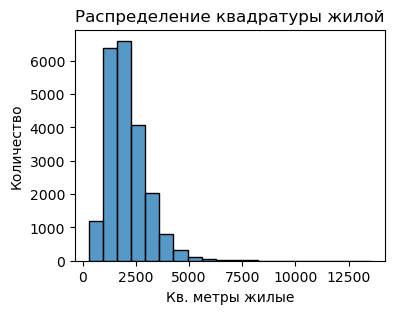

In [4]:
plt.figure(figsize=(4, 3))
sns.histplot(df['sqft_living'], bins=20)
plt.title('Распределение квадратуры жилой')
plt.xlabel('Кв. метры жилые')
plt.ylabel('Количество');

**Вывод:** Большинство домов имеют площадь до 2 500 кв.м, но есть и более 12 500 кв.м

**1.4** Изучите распределение года постройки

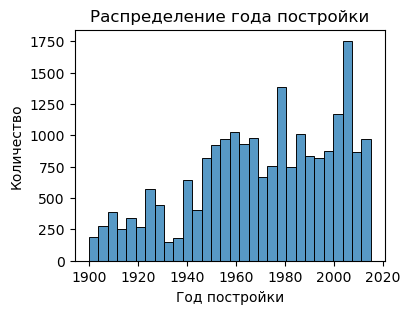

In [5]:
plt.figure(figsize=(4, 3))
sns.histplot(df['yr_built'], bins=30)
plt.title('Распределение года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Количество');

**Вывод:** Можно сделать вывод что самое большое количество домов было построено в 1975-1980 годах и 2005-2010 годах. Самое малое количество постороено в промежутке с 1932 по 1939.

**Условие 2: 2 задача**

**2.1** Изучите распределение домов от наличия вида на набережную

Постройте график

Сделайте выводы

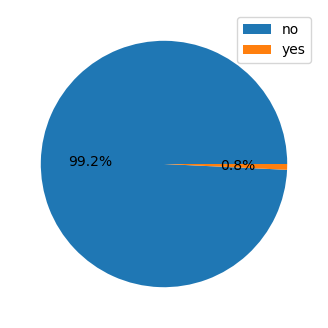

In [6]:
data = df['waterfront'].value_counts()

plt.figure(figsize=(6, 4))
plt.pie(data, autopct='%1.1f%%')
plt.legend(['no', 'yes']);

**Вывод:** Только 0,8% домов имеют вид на набережную.

**2.2** Изучите распределение этажей домов

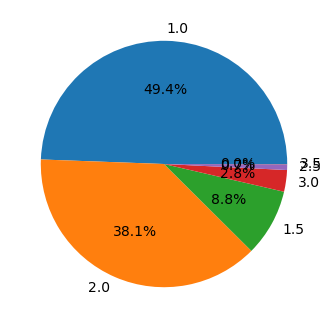

In [7]:
data = df['floors'].value_counts()

plt.figure(figsize=(6, 4))
plt.pie(data, autopct='%1.1f%%', labels=data.index);

**Вывод:** Больше всего одноэтажных домов, далее идут двухэтажные.

**2.3** Изучите распределение состояния домов

In [8]:
data = df['condition'].value_counts()
data

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

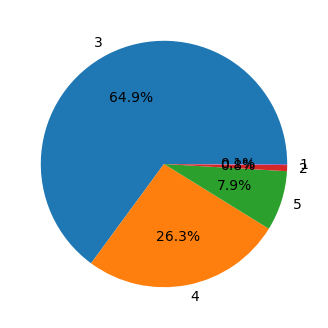

In [9]:
plt.figure(figsize=(6, 4))
plt.pie(data, autopct='%1.1f%%', labels=data.index);

**Вывод:** Больше всего домов по состоянию 3 балла, далее 4. Меньше всего домов по состоянию 1.

**Условие 3: 3 задача**

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.

Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [10]:
df1=round(df.pivot_table(index='condition',columns='grade',
              values='price', aggfunc='mean',
              fill_value=0
              ),2)
df1

grade,1,3,4,5,6,7,8,9,10,11,12,13
condition,,,,,,,,,,,,
1,142000,0,150000,280833.33,303813.64,334416.67,932500.00,0.00,0.00,0.00,0.00,0.00
2,0,280000,179600,206166.67,269483.90,342698.52,421996.15,715000.00,1752500.00,0.00,0.00,0.00
3,0,75000,210000,246993.46,290651.85,385666.79,510102.77,726587.80,1012934.13,1414401.44,2138601.08,3338636.36
4,0,0,243905,245299.01,318731.57,412923.07,589527.30,889664.52,1176284.59,1839916.43,2467961.54,5750000.00
5,0,262000,0,271127.59,310140.86,479667.75,736538.05,1123419.90,1735830.36,2238477.27,2290000.00,0.00


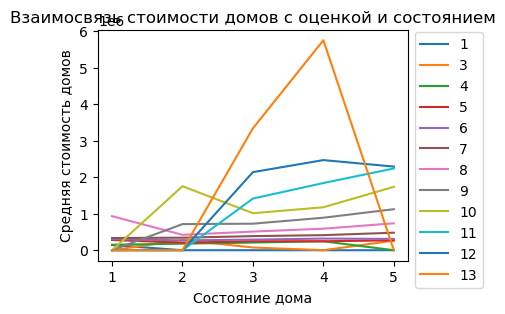

In [11]:
plt.figure(figsize=(4, 3))
plt.plot(df1)
plt.title('Взаимосвязь стоимости домов с оценкой и состоянием')
plt.xlabel('Состояние дома')
plt.ylabel('Средняя стоимость домов')
plt.legend(df1,bbox_to_anchor=(1, 1.02));

**Вывод:** По данному графику четко прослеживается зависимость стоимости домов от их оценки и состояния. Мы можем наблюдать увеличение стоимости домов с повышением оценки дома и в более лучшем состоянии.

In [12]:
df2=round(df.pivot_table(index='bedrooms',
              values='price', aggfunc='mean',
              fill_value=0
              ),2)
df2

,price
bedrooms,
0,409503.85
1,317642.88
2,401372.68
3,466232.08
4,635419.50
5,786599.83
6,825520.64
7,951184.66
8,1105076.92


In [13]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

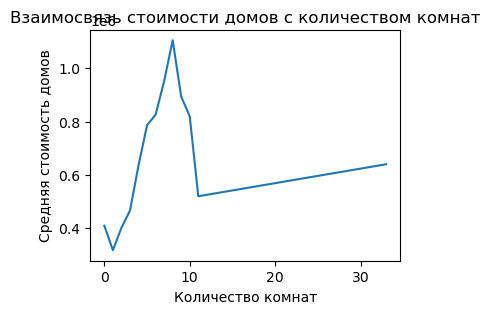

In [14]:
plt.figure(figsize=(4, 3))
plt.plot(df2)
plt.title('Взаимосвязь стоимости домов с количеством комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Средняя стоимость домов');

**Вывод:** Больше комнат - выше цена

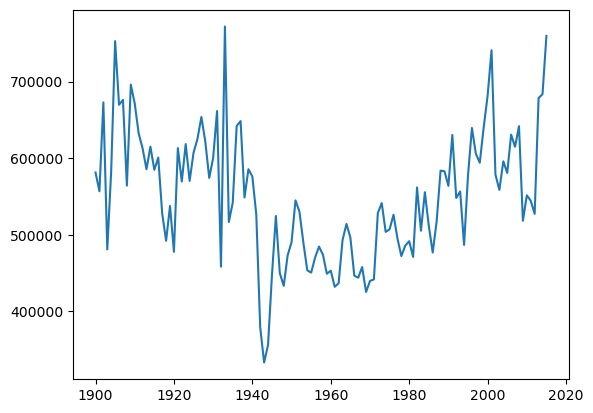

In [15]:
df_y=round(df.pivot_table(index='yr_built',
              values='price', aggfunc='mean',
              fill_value=0
              ),2)
plt.plot(df_y)

**Вывод:** По данному графику можно сделать вывод, что по какой то причине дома построенные в диапозоне 1940 - 1990 годах просели в стоимости судя по средней стоимости домов построенных в этом периоде.

In [16]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
price,0.0,1.0,0.3,0.5,0.7,0.0,0.3,0.3,0.4,0.0,0.7,0.6,0.3,0.0,0.0,0.0,0.3,0.0,0.6,0.0
bedrooms,0.0,0.3,1.0,0.5,0.6,0.0,0.0,0.0,0.0,0.0,0.4,0.5,0.3,0.0,0.0,0.0,0.0,0.0,0.4,0.0
bathrooms,0.0,0.5,0.5,1.0,0.8,0.0,0.5,0.0,0.0,0.0,0.7,0.7,0.3,0.5,0.0,0.0,0.0,0.0,0.6,0.0
sqft_living,0.0,0.7,0.6,0.8,1.0,0.0,0.4,0.0,0.3,0.0,0.8,0.9,0.4,0.3,0.0,0.0,0.0,0.0,0.8,0.0
sqft_lot,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7
floors,0.0,0.3,0.0,0.5,0.4,0.0,1.0,0.0,0.0,-0.3,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.3,0.0
waterfront,0.0,0.3,0.0,0.0,0.0,0.0,0.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,0.4,0.0,0.0,0.3,0.0,0.0,0.4,1.0,0.0,0.3,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.3,0.0
condition,0.0,0.0,0.0,0.0,0.0,0.0,-0.3,0.0,0.0,1.0,0.0,0.0,0.0,-0.4,0.0,0.0,0.0,0.0,0.0,0.0


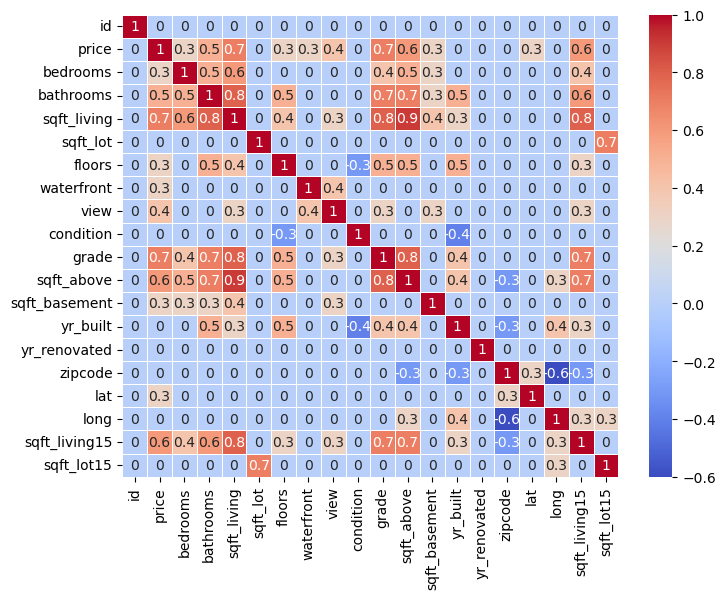

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm');

**Вывод:** Самые явные показатели влияющие на стоиомсть домов являются Оценка и Жилая площадь, чуть меньше - количество ванных комнат, площадь вокруг дома, еще меньшее влияние, но все таки взаимосвязь присутствует, наличие подвала, вид, этажность, количество комнат и месторасположение по широте.